In [4]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.pseudo_scalar_mediator import PseudoScalarMediator, PseudoScalarMFV
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import up_quark_mass as muq
from hazma.parameters import down_quark_mass as mdq
from hazma.parameters import strange_quark_mass as msq
from hazma.parameters import electron_mass as me
from hazma.parameters import muon_mass as mmu
from hazma.parameters import b0, fpi, vh

This function makes nice $\LaTeX$ labels for different final states

In [2]:
def get_tex_label(fs):
    tex_label = r"$"+ fs
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    return tex_label + r"$"

def get_color(fs):
    fss = sorted(list(set(PseudoScalarMediator.list_final_states())))
    return list(plt.rcParams["axes.prop_cycle"])[fss.index(fs)]["color"]

In [7]:
psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=muq/vh, gpdd=mdq/vh, gpss=0., gpee=0., gpmumu=0., gpGG=0., gpFF=0.)

print "beta = ", psm.beta
print "mpi0, mpi0 (shifted) = ", mpi0, psm.mpi0

beta =  -2.5310351923e-06
mpi0, mpi0 (shifted) =  134.9766 134.97659997670178


## Branching fractions as a function of $m_\chi$

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


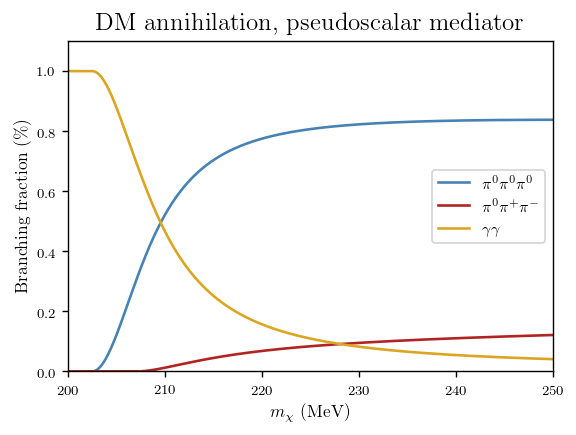

In [5]:
mx_min, mx_max, n_mxs = 200., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

# psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpqq=1., gpll=0., gpGG=3., gpFF=2./3.)
psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=muq/vh, gpdd=-mdq/vh, gpss=-msq/vh, gpee=0., gpmumu=0., gpGG=0., gpFF=0.)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    psm.mx = mx
    e_cm = 2. * psm.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(psm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in psm.list_final_states()}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
    if fs in ["g g", "pi0 pi0 pi0", "pi0 pi pi"]:
#     if fs not in ["p p"]:
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("DM annihilation, pseudoscalar mediator")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.1)

plt.savefig("figures/pseudoscalar_branching_fractions_mfv.pdf")

## Cross section
DM annihilation is $s$-wave

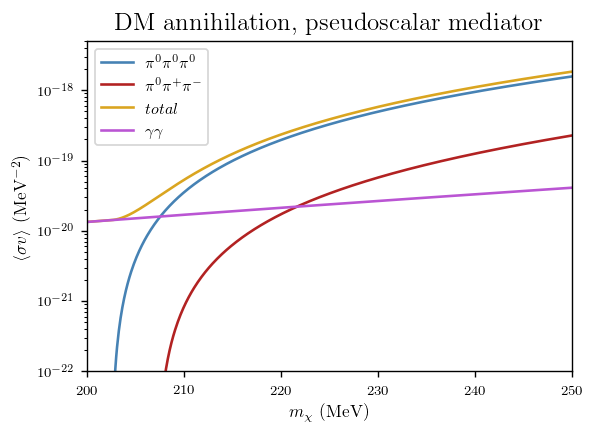

In [18]:
mx_min, mx_max, n_mxs = 200., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpqq=1., gpll=0., gpGG=3., gpFF=2./3.)
# psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=muq/vh, gpdd=mdq/vh, gpss=0., gpee=0., gpmumu=0., gpGG=1., gpFF=0.)
# psm = PseudoScalarMediator(mx=200., mp=1e3, gpxx=1., gpuu=-muq/vh, gpdd=-mdq/vh, gpss=0., gpee=0., gpmumu=0., gpGG=1., gpFF=0.)

vx_mw = 1.0e-4  # approximate DM velocity in Milky Way halo

svs_varying_gs = {}

# Compute branching fractions for different couplings
svs_raw = []
for mx in mxs:
    psm.mx = mx
    e_cm = 2. * psm.mx * (1. + 0.5 * vx_mw**2)
    svs_raw.append(psm.cross_sections(e_cm))
    
svs = {fs: [vx_mw * sv[fs] for sv in svs_raw] for fs in psm.list_final_states() + ["total"]}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, sv_list in svs.iteritems():
    if fs in ["g g", "pi0 pi0 pi0", "pi0 pi pi", "total"]:
#     if fs not in ["p p"]:
        plt.plot(mxs, sv_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("DM annihilation, pseudoscalar mediator")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$\langle \sigma v \rangle$ (MeV$^{-2}$)")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(1e-22, 5e-18)
plt.yscale("log")

# plt.savefig("figures/pseudoscalar_branching_fractions_mfv.pdf")